In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
df=pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='latin-1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
#lets first drop the unknown columns
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [5]:
df=df.rename({'v1':'target',
             'v2':'text'},axis=1)

In [6]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
#lets make another column i.e the length of the text
len_text=[]
for i in df['text']:
    len_text.append(len(i))

In [8]:
df['text_length']=len_text

In [9]:
df

,target,text,text_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


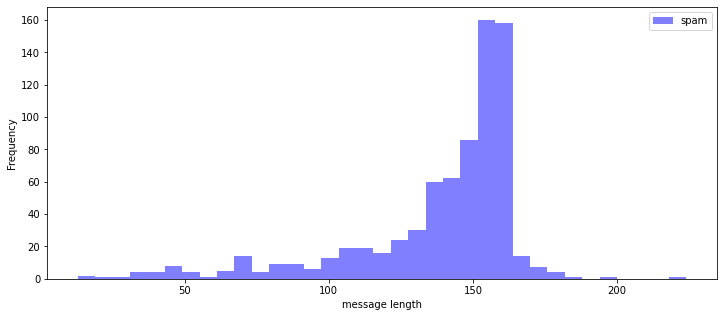

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
df[df['target']=='spam']['text_length'].plot(bins=35,kind='hist',color='blue',label='spam',alpha=0.5)
plt.legend()
plt.xlabel('message length')
plt.show()

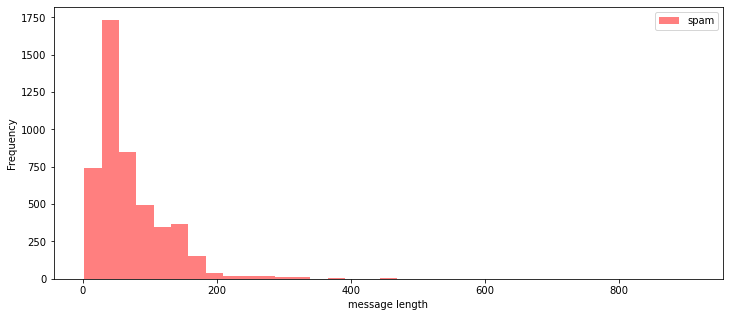

In [11]:
plt.figure(figsize=(12,5))
df[df['target']=='ham']['text_length'].plot(bins=35,kind='hist',color='red',label='spam',alpha=0.5)
plt.legend()
plt.xlabel('message length')
plt.show()

In [12]:
#from the above two histograms we can conclude that spam messages are mostly of length bw 150-200
#and ham messages are of shorter length

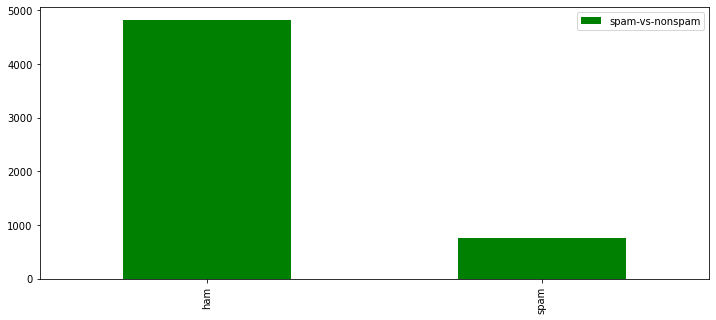

In [13]:
plt.figure(figsize=(12,5))
df['target'].value_counts().plot(kind='bar',color='green',label='spam-vs-nonspam')
plt.legend()
plt.show()

In [14]:
#from this figure we can conclude that ham messages are more than spam messages

In [15]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [16]:
df['target']=np.where(df['target']=='spam',1,0)

In [17]:
spam=[]
ham=[]
spam_class=df[df['target']==1]['text']
ham_class=df[df['target']==0]['text']

In [18]:
def extract_ham(ham_class):
    global ham
    words = [word.lower() for word in word_tokenize(ham_class) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    ham=ham+words

In [19]:
def extract_spam(spam_class):
    global spam
    words = [word.lower() for word in word_tokenize(spam_class) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    spam=spam+words

In [20]:
spam_class.apply(extract_spam)
ham_class.apply(extract_ham )

0       None
1       None
3       None
4       None
6       None
        ... 
5565    None
5568    None
5569    None
5570    None
5571    None
Name: text, Length: 4825, dtype: object

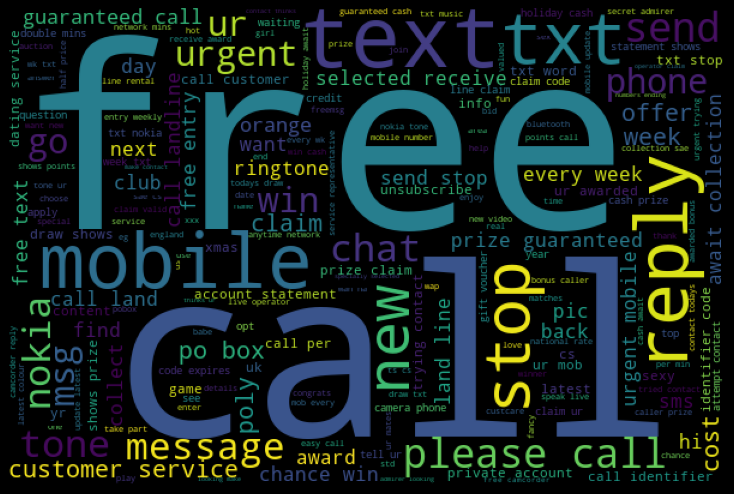

In [21]:
from wordcloud import WordCloud
spam_wordcloud = WordCloud(width=600, height=400).generate(" ".join(spam))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

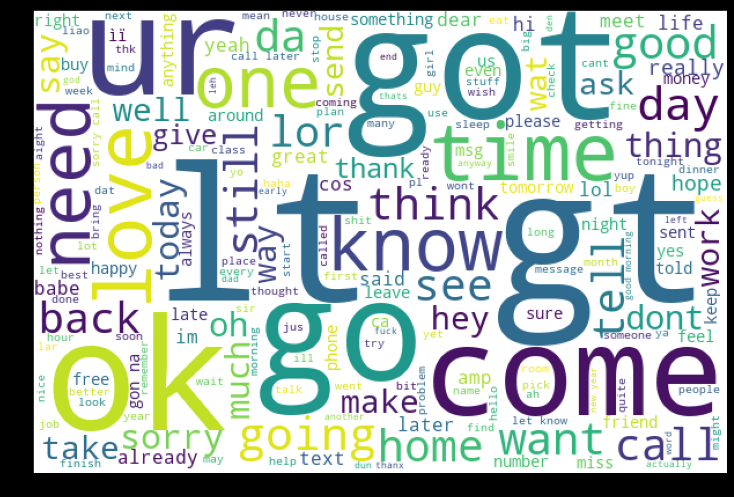

In [22]:
ham_cloud=WordCloud(width=600,height=400,background_color='white').generate(" ".join(ham))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(ham_cloud)
plt.tight_layout(pad=0)
plt.show()

In [23]:
#top 10 spam words=
spam_words=np.array(spam)
pd.Series(spam_words).value_counts().head(n=10)

call      346
free      217
txt       156
u         144
ur        144
mobile    123
text      121
stop      114
claim     113
reply     104
dtype: int64

In [24]:
#top 10 ham words
ham_words=np.array(ham)
pd.Series(ham_words).value_counts().head(n=10)

u       974
gt      318
lt      316
get     301
go      246
ok      246
got     242
ur      237
know    234
like    231
dtype: int64

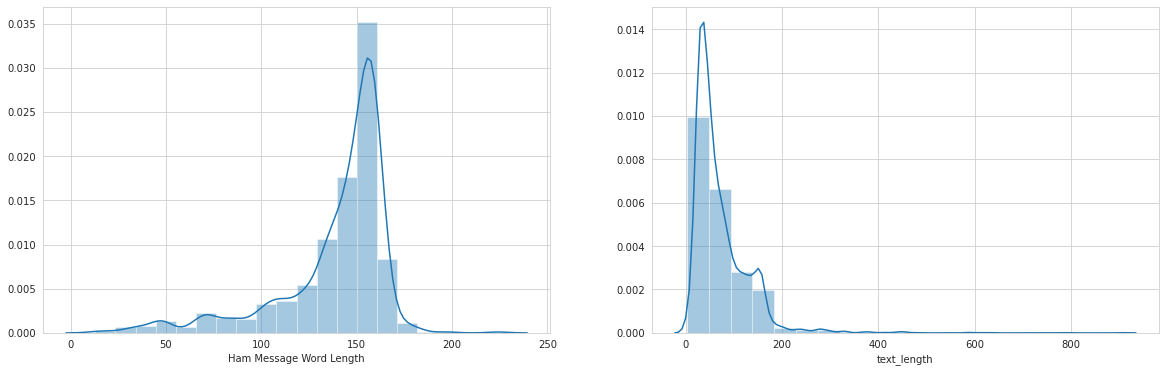

In [25]:
import seaborn as sns
sns.set_style('whitegrid')

f, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.distplot(df[df["target"] == 1]["text_length"], bins = 20, ax = ax[0])
ax[0].set_xlabel("Spam Message Word Length")

sns.distplot(df[df["target"] == 0]["text_length"], bins = 20, ax = ax[1])
ax[0].set_xlabel("Ham Message Word Length")

plt.show()

In [26]:
#now  we are done with visualizations task,next move into text ceaning

In [27]:
from nltk.stem import SnowballStemmer
import string
stemmer = SnowballStemmer("english")

def cleanText(message):
    
    message = message.translate(str.maketrans('', '', string.punctuation))
    words = [stemmer.stem(word) for word in message.split() if word.lower() not in stopwords.words("english")]
    
    return " ".join(words)

df["text"] = df["text"].apply(cleanText)
df.head(n = 10)    

,target,text,text_length
0,0,go jurong point crazi avail bugi n great world...,111
1,0,ok lar joke wif u oni,29
2,1,free entri 2 wkli comp win fa cup final tkts 2...,155
3,0,u dun say earli hor u c alreadi say,49
4,0,nah dont think goe usf live around though,61
5,1,freemsg hey darl 3 week word back id like fun ...,148
6,0,even brother like speak treat like aid patent,77
7,0,per request mell mell oru minnaminungint nurun...,160
8,1,winner valu network custom select receivea å£9...,158
9,1,mobil 11 month u r entitl updat latest colour ...,154


In [28]:
y=df['target']
x=df['text']

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
cv=CountVectorizer()
lr=LogisticRegression(max_iter=10000)
x_train=cv.fit_transform(x_train)

In [31]:
lr.fit(x_train,y_train)
pred_1=lr.predict(cv.transform(x_test))
score_1=accuracy_score(y_test,pred_1)
score_1

0.9775784753363229

In [32]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)
pred_2=nb.predict(cv.transform(x_test))
score_2=accuracy_score(y_test,pred_2)
score_2

0.9820627802690582

In [33]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
pred_3=svm.predict(cv.transform(x_test))
score_3=accuracy_score(y_test,pred_3)
score_3

0.9730941704035875